# Importing Packages

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope

In [2]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score
from customMetrics import dice_loss, dice_coef, iou

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Loading Utils Functions

In [5]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [6]:
def read_image(path):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    # x = cv2.resize(x, (W, H))
    ori_x = x
    x = x/255.0
    x = x.astype(np.float32)
    return ori_x, x

In [7]:
def read_mask(path):
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (512, 512)
    # x = cv2.resize(x, (W, H))
    ori_x = x
    x = x/255.0
    x = x.astype(np.int32)
    return ori_x, x

In [8]:
def load_data(path):
    x = sorted(glob(os.path.join(path, "image", "*.jpg")))
    y = sorted(glob(os.path.join(path, "mask", "*.jpg")))
    return x, y

In [24]:
def save_results(ori_x, ori_y, y_pred, save_image_path):
    line = np.ones((H, 10, 3)) * 255

    ori_y = np.expand_dims(ori_y, axis=-1)
    ori_y = np.concatenate([ori_y, ori_y, ori_y], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1) * 255

    cat_images = np.concatenate([ori_x, line, ori_y, line, y_pred], axis=1)
    
    cv2.imwrite(save_image_path, cat_images)

In [10]:
def get_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    sen = tp/(tp+fn)
    spe = tn/(tn+fp) 
    return sen, spe

# Setting The Environment

In [11]:
H = 512
W = 512

In [12]:
""" Save the results in this folder """
create_dir("results")

In [31]:
""" Load the model """
with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
    model = tf.keras.models.load_model("files/model2.h5")


In [16]:
""" Load the dataset """
dataset_path = os.path.join("new_data", "train_test")
test_x, test_y = load_data(dataset_path)

In [18]:
from matplotlib import pyplot as plt

In [32]:
""" Make the prediction and calculate the metrics values """
SCORE = []
for x, y in tqdm(zip(test_x, test_y), total=len(test_x)):
    """ Extracting name """
    name = x.split("\\")[-1].split(".")[0]
    print(name)
    """ Read the image and mask """
    ori_x, x = read_image(x)
    ori_y, y = read_mask(y)

    """ Prediction """
    y_pred = model.predict(np.expand_dims(x, axis=0))[0]
    y_pred = y_pred > 0.5
    y_pred = y_pred.astype(np.int32)
    y_pred = np.squeeze(y_pred, axis=-1)

    """ Saving the images """
    save_image_path = f"results\\{name}Train.png"
    print(save_image_path)
    save_results(ori_x, ori_y, y_pred, save_image_path)

    """ Flatten the array """
    y = y.flatten()
    y_pred = y_pred.flatten()

    """ Calculate the metrics """
    acc_value = accuracy_score(y, y_pred)
    f1_value = f1_score(y, y_pred, labels=[0, 1], average="binary")
    jac_value = jaccard_score(y, y_pred, labels=[0, 1], average="binary")
    recall_value = recall_score(y, y_pred, labels=[0, 1], average="binary")
    precision_value = precision_score(y, y_pred, labels=[0, 1], average="binary")
    
    cm = confusion_matrix(y, y_pred)
    sensitivity, specificity = get_metrics(cm)
    
    SCORE.append([name, acc_value, f1_value, jac_value, recall_value, precision_value, sensitivity, specificity])
    
    

  0%|          | 0/20 [00:00<?, ?it/s]

21_training
results\21_trainingTrain.png


  5%|▌         | 1/20 [00:01<00:22,  1.21s/it]

22_training
results\22_trainingTrain.png


 10%|█         | 2/20 [00:01<00:16,  1.11it/s]

23_training
results\23_trainingTrain.png


 15%|█▌        | 3/20 [00:02<00:13,  1.22it/s]

24_training
results\24_trainingTrain.png


 20%|██        | 4/20 [00:03<00:12,  1.32it/s]

25_training
results\25_trainingTrain.png


 25%|██▌       | 5/20 [00:03<00:10,  1.38it/s]

26_training
results\26_trainingTrain.png


 30%|███       | 6/20 [00:04<00:10,  1.38it/s]

27_training
results\27_trainingTrain.png


 35%|███▌      | 7/20 [00:05<00:09,  1.38it/s]

28_training
results\28_trainingTrain.png


 40%|████      | 8/20 [00:06<00:08,  1.40it/s]

29_training
results\29_trainingTrain.png


 45%|████▌     | 9/20 [00:06<00:07,  1.44it/s]

30_training
results\30_trainingTrain.png


 50%|█████     | 10/20 [00:07<00:06,  1.44it/s]

31_training
results\31_trainingTrain.png


 55%|█████▌    | 11/20 [00:08<00:06,  1.47it/s]

32_training
results\32_trainingTrain.png


 60%|██████    | 12/20 [00:08<00:05,  1.47it/s]

33_training
results\33_trainingTrain.png


 65%|██████▌   | 13/20 [00:09<00:04,  1.46it/s]

34_training
results\34_trainingTrain.png


 70%|███████   | 14/20 [00:10<00:04,  1.47it/s]

35_training
results\35_trainingTrain.png


 75%|███████▌  | 15/20 [00:10<00:03,  1.45it/s]

36_training
results\36_trainingTrain.png


 80%|████████  | 16/20 [00:11<00:02,  1.46it/s]

37_training
results\37_trainingTrain.png


 85%|████████▌ | 17/20 [00:12<00:02,  1.48it/s]

38_training
results\38_trainingTrain.png


 90%|█████████ | 18/20 [00:12<00:01,  1.48it/s]

39_training
results\39_trainingTrain.png


 95%|█████████▌| 19/20 [00:13<00:00,  1.48it/s]

40_training
results\40_trainingTrain.png


100%|██████████| 20/20 [00:14<00:00,  1.41it/s]


In [33]:
SCORE

[['21_training',
  0.9531288146972656,
  0.5484878550692683,
  0.377873417721519,
  0.9835266209804955,
  0.38028025477707006,
  0.9835266209804955,
  0.9522226936312639],
 ['22_training',
  0.9451217651367188,
  0.5392056374119155,
  0.36911809849581195,
  0.9623828035673451,
  0.3745216694847379,
  0.9623828035673451,
  0.9445260025730274],
 ['23_training',
  0.9642105102539062,
  0.5925475549378962,
  0.42100715872624045,
  0.9320945484355786,
  0.4343286432800662,
  0.9320945484355786,
  0.9651329343667222],
 ['24_training',
  0.938934326171875,
  0.6060829765244353,
  0.43480563499629277,
  0.9767607868020305,
  0.43935069568319657,
  0.9767607868020305,
  0.9370231149012568],
 ['25_training',
  0.9501190185546875,
  0.6012928405903158,
  0.42989187303801885,
  0.9629846664713351,
  0.4371148645653234,
  0.9629846664713351,
  0.9495960778865048],
 ['26_training',
  0.9579238891601562,
  0.5980906573385804,
  0.42662577324946716,
  0.9204800358905338,
  0.4429512089810017,
  0.9204

In [34]:
score = [s[1:] for s in SCORE]
score = np.mean(score, axis=0)
print(f"Accuracy: {score[0]:0.5f}")
print(f"F1: {score[1]:0.5f}")
print(f"Jaccard: {score[2]:0.5f}")
print(f"Recall: {score[3]:0.5f}")
print(f"Precision: {score[4]:0.5f}")
print(f"Sensitivity: {score[5]:0.5f}")
print(f"Specificity: {score[6]:0.5f}")



Accuracy: 0.94745
F1: 0.54506
Jaccard: 0.37557
Recall: 0.93456
Precision: 0.38623
Sensitivity: 0.93456
Specificity: 0.94785


In [35]:
""" Saving """
df = pd.DataFrame(SCORE, columns=["Image", "Acc", "F1", "Jaccard", "Recall", "Precision", "Sensitivity", "Specificity"])
df

,Image,Acc,F1,Jaccard,Recall,Precision,Sensitivity,Specificity
0,21_training,0.953129,0.548488,0.377873,0.983527,0.380280,0.983527,0.952223
1,22_training,0.945122,0.539206,0.369118,0.962383,0.374522,0.962383,0.944526
2,23_training,0.964211,0.592548,0.421007,0.932095,0.434329,0.932095,0.965133
3,24_training,0.938934,0.606083,0.434806,0.976761,0.439351,0.976761,0.937023
4,25_training,0.950119,0.601293,0.429892,0.962985,0.437115,0.962985,0.949596
5,26_training,0.957924,0.598091,0.426626,0.920480,0.442951,0.920480,0.959242
6,27_training,0.945976,0.538035,0.368022,0.961301,0.373556,0.961301,0.945458
7,28_training,0.939137,0.550652,0.379931,0.977600,0.383267,0.977600,0.937611
8,29_training,0.951336,0.558352,0.387301,0.954320,0.394617,0.954320,0.951237
9,30_training,0.964817,0.574840,0.403351,0.818779,0.442890,0.818779,0.969186


In [36]:
# df.to_csv("files/score.csv")


In [37]:
import seaborn as sns

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

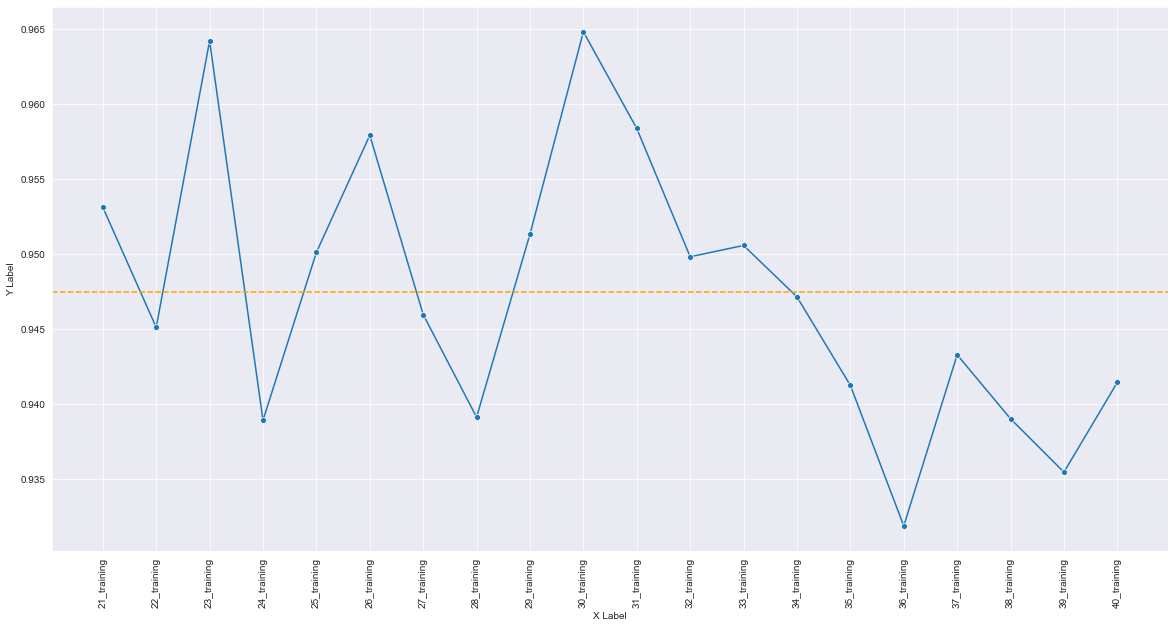

In [38]:
plt.figure(figsize=(20, 10))
sns.set_style("darkgrid")
ax = sns.lineplot(data=df, x="Image", y="Acc", marker = "o")
ax.axhline(df["Acc"].mean(), color="orange", linestyle="--")
ax.set(xlabel="X Label", ylabel = "Y Label")
plt.setp(ax.get_xticklabels(), rotation=90)
